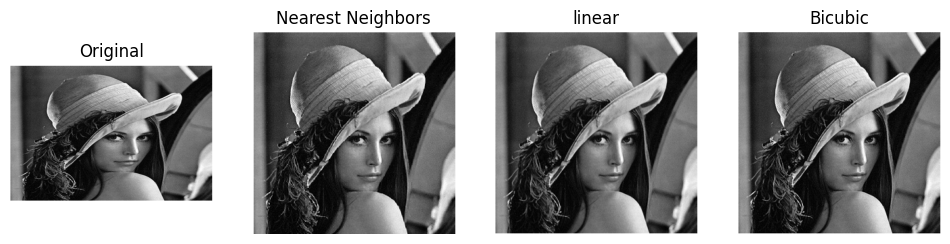

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = "Image1.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

new_size = (300, 300)

# Resize using different interpolation methods
nearest = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
linear = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)

# Display results
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(nearest)
axes[1].set_title("Nearest Neighbors")
axes[2].imshow(linear)
axes[2].set_title("linear")
axes[3].imshow(bicubic)
axes[3].set_title("Bicubic")

for ax in axes:
    ax.axis("off")

plt.show()

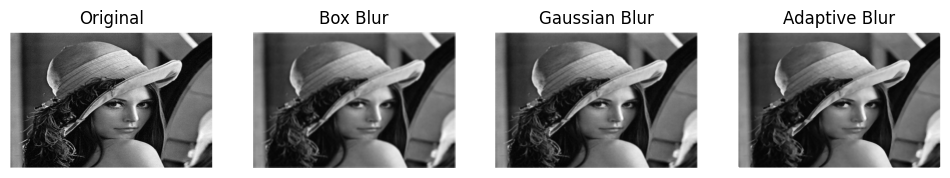

In [ ]:
# Apply different blurring techniques
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.medianBlur(image, 5)  # (Median) blur

# Display results
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(box_blur)
axes[1].set_title("Box Blur")
axes[2].imshow(gaussian_blur)
axes[2].set_title("Gaussian Blur")
axes[3].imshow(adaptive_blur)
axes[3].set_title("Adaptive Blur")

for ax in axes:
    ax.axis("off")

plt.show()


Naive Bayes - Average K-Fold Accuracy: 0.8226

Metrics for Naive Bayes:
Accuracy: 0.8111
Precision: 0.8480
Recall: 0.8111
F1-Score: 0.8151
Confusion Matrix:
[[33  0  0  0  1  1  0  0  1  0]
 [ 0 29  1  0  0  0  1  0  3  2]
 [ 0  3 19  0  0  0  0  0 13  0]
 [ 0  0  1 26  0  0  0  1  8  1]
 [ 0  2  0  0 26  0  1  6  1  0]
 [ 0  0  0  0  0 35  0  1  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  1  0  0  0  0  1 29  0]
 [ 0  3  1  0  0  0  0  4  3 25]]


<ipython-input-6-96a5a027c90d>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


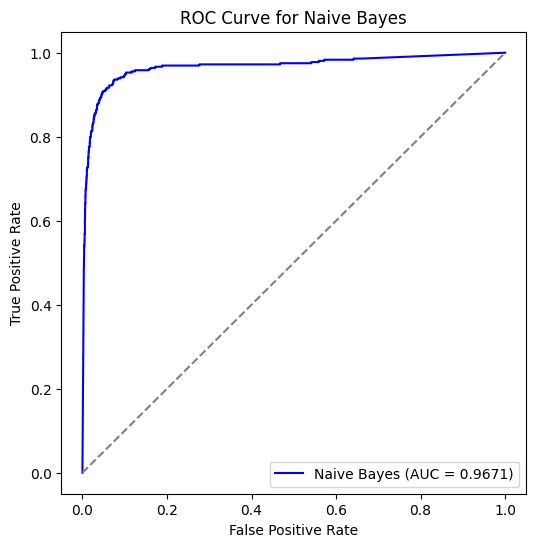


Random Forest - Average K-Fold Accuracy: 0.9729

Metrics for Random Forest:
Accuracy: 0.9611
Precision: 0.9620
Recall: 0.9611
F1-Score: 0.9609
Confusion Matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  2 30  0]
 [ 0  0  0  1  0  0  0  1  1 33]]


<ipython-input-6-96a5a027c90d>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


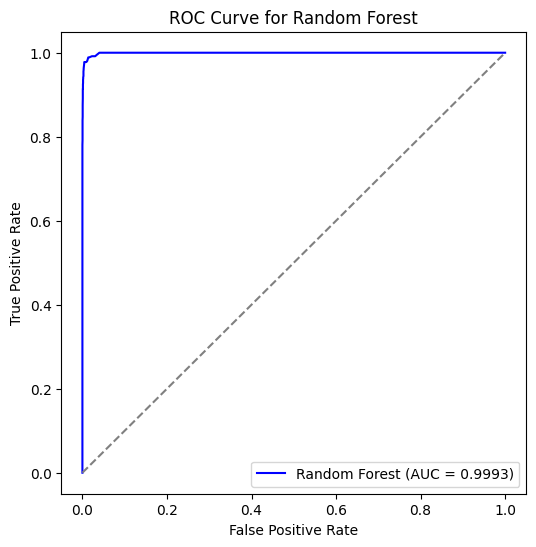

(0.9611111111111111,
 0.9619957049958986,
 0.9611111111111111,
 0.9609403298924463,
 array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
        [ 0, 35,  0,  0,  0,  1,  0,  0,  0,  0],
        [ 1,  0, 34,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  1],
        [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
        [ 0,  3,  0,  0,  0,  0,  0,  2, 30,  0],
        [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 33]]),
 0.9992986968449931)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Normalize feature values
X = X / 16.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Setup for K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def compute_metrics(y_test, y_pred, model_name, y_prob=None):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    if y_prob is not None:
        y_bin = label_binarize(y_test, classes=np.unique(y_test))
        fpr, tpr, _ = roc_curve(y_bin.ravel(), y_prob.ravel())
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()

        return acc, precision, recall, f1, conf_matrix, auc_score

    return acc, precision, recall, f1, conf_matrix

# Naive Bayes model
nb_model = GaussianNB()
nb_accuracies = cross_val_score(nb_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"\nNaive Bayes - Average K-Fold Accuracy: {np.mean(nb_accuracies):.4f}")
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)
compute_metrics(y_test, y_pred_nb, "Naive Bayes", y_prob_nb)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracies = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"\nRandom Forest - Average K-Fold Accuracy: {np.mean(rf_accuracies):.4f}")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)
compute_metrics(y_test, y_pred_rf, "Random Forest", y_prob_rf)
